In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

# Import Data

In [3]:
df = pd.read_csv("data/iris.csv", index_col="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Visualize Data

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

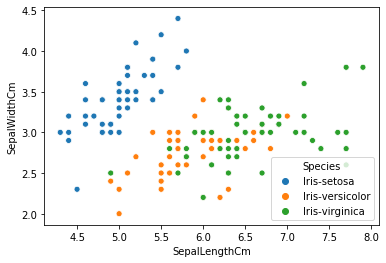

In [9]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)

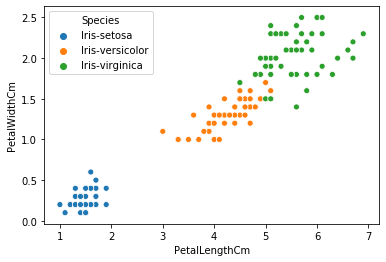

In [10]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)

# Dataset Splitting

In [11]:
X = df.drop(columns="Species")
y = df.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

# Training 

In [13]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp
from sklearn.linear_model import LogisticRegression

In [15]:
gsp.logreg_params

{'algo__fit_intercept': [True, False],
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

### One vs rest 

In [18]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(multi_class='ovr', solver='lbfgs', n_jobs=-1, random_state=42))
])

model = GridSearchCV(pipeline, gsp.logreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'algo__C': 1000.0, 'algo__fit_intercept': False}
0.9583333333333334 0.9500000000000001 0.9666666666666667


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    2.3s finished


### Multinomial

In [20]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(multi_class='multinomial', solver='lbfgs', n_jobs=-1, random_state=42))
])

model = GridSearchCV(pipeline, gsp.logreg_params, cv=4, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 14 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.6s


{'algo__C': 10.0, 'algo__fit_intercept': True}
0.9833333333333333 0.9666666666666667 1.0


[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:   11.3s finished
